You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/Python_Crash_course_2020/7-Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [1]:
from datetime import datetime

In [2]:
year =2021
month= 1
day =1

In [3]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [4]:
# we can extract any information from our datetime object. 
my_date.month

1

In [5]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [6]:
import numpy as np

In [7]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [8]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [9]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [10]:
import pandas as pd

In [11]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2020-01-01', periods=7, freq='D')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [12]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [13]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [14]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(data=['first day of the year', 'first day of school'],index= custom_index, columns= ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [15]:
df.columns

Index(['Event'], dtype='object')

In [16]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [17]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [18]:
df.index.argmax()

1

#### Pandas datareader

In [23]:
import pandas_datareader.data as web

In [35]:
start = pd.to_datetime('2021-01-01')
end   = pd.to_datetime('today')

In [27]:
end

Timestamp('2024-01-24 09:44:24.819223')

In [25]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [ ]:
Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
Stocks.tail()

While the pandas_datareader library was previously used for fetching stock data from various sources, including Yahoo Finance, Yahoo Finance data access through pandas_datareader has been deprecated since version 0.7.0 due to API instability.

In [31]:
# if pandas_datareader didn't work, try yfinance. 
# !pip install yfinance


In [32]:
import yfinance as yf

In [36]:
Stocks = yf.download(Ticker, start, end)
Stocks.tail()

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2024-01-17  182.679993  215.550003  182.679993  215.550003  182.929993   
2024-01-18  188.630005  211.880005  188.630005  211.880005  189.139999   
2024-01-19  191.559998  212.190002  191.559998  212.190002  191.949997   
2024-01-22  193.889999  208.800003  193.889999  208.800003  195.330002   
2024-01-23  195.179993  209.139999  195.179993  209.139999  195.750000   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2024-01-17  215.669998  180.300003  212.009995  181.270004  214.860001   
2024-01-18  217.449997  185.830002  208.740005  186.089996  216.880005   
2024-01-19  213.190002  188.820007  207.559998  189.330002  209.990005   
2024-01-22  217.800003  192.259995  206.270004  192.300003  212.259995   
2024-01-23  215.649994  193.830002  207.750000  195.020004  211.300003   

              Volume             
                AAPL       TSLA  
Date                             
2024-01-17  47317400  103164400  
2024-01-18  78005800  108595400  
2024-01-19  68741000  102095800  
2024-01-22  60133900  117952500  
2024-01-23  42300900  106261200

In [40]:
df= round(Stocks['Adj Close'],2)
df.tail()

,AAPL,TSLA
Date,,
2024-01-17,182.68,215.55
2024-01-18,188.63,211.88
2024-01-19,191.56,212.19
2024-01-22,193.89,208.80
2024-01-23,195.18,209.14


In [41]:
import matplotlib.pyplot as plt

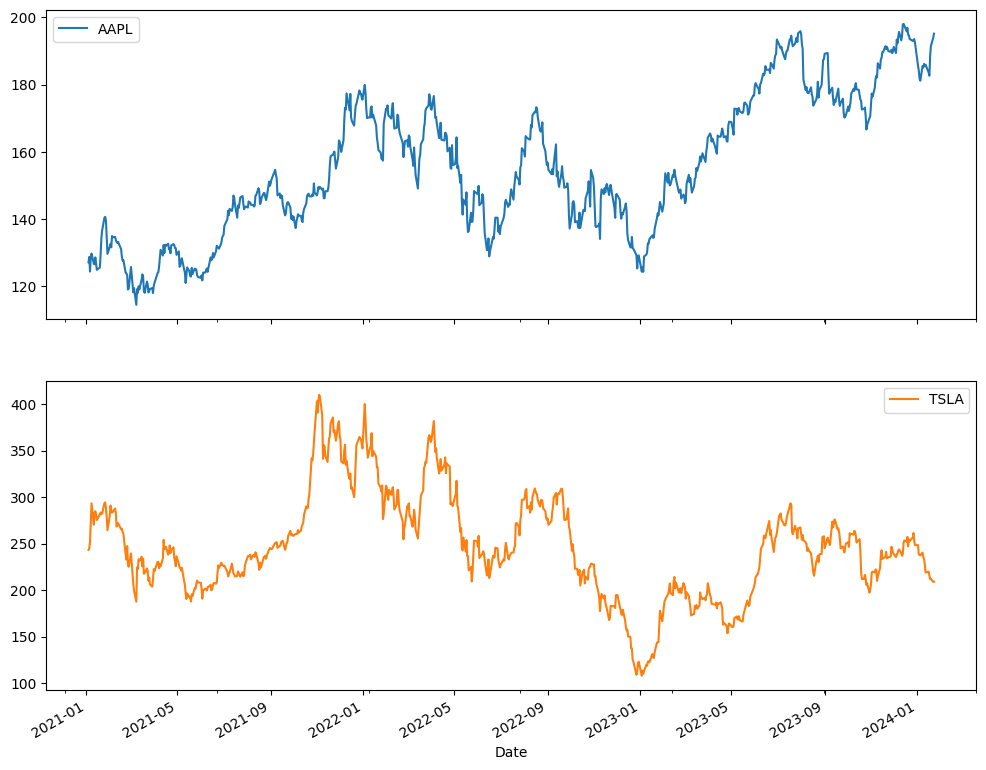

In [42]:
df.plot(subplots=True, figsize=(12,10))
plt.show()

In [43]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23'],
              dtype='datetime64[ns]', name='Date', length=768, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [44]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

,AAPL,TSLA
Date,,
2021-01-31,130.727368,276.258947
2021-02-28,129.401053,264.757368
2021-03-31,119.934783,218.934348
2021-04-30,129.720000,236.539048
2021-05-31,124.939500,205.584000
2021-06-30,128.111364,208.973636
2021-07-31,143.076190,219.711905
2021-08-31,146.251364,235.080455
2021-09-30,146.416190,251.317143


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [46]:
df.resample(rule='M').mean().apply(lambda x: x/x[0])

C:\Users\A02291312\AppData\Local\Temp\ipykernel_16836\479810324.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.resample(rule='M').mean().apply(lambda x: x/x[0])


,AAPL,TSLA
Date,,
2021-01-31,1.000000,1.000000
2021-02-28,0.989854,0.958367
2021-03-31,0.917442,0.792497
2021-04-30,0.992294,0.856222
2021-05-31,0.955726,0.744171
2021-06-30,0.979989,0.756441
2021-07-31,1.094462,0.795311
2021-08-31,1.118751,0.850942
2021-09-30,1.120012,0.909716


C:\Users\A02291312\AppData\Local\Temp\ipykernel_16836\2016419737.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))


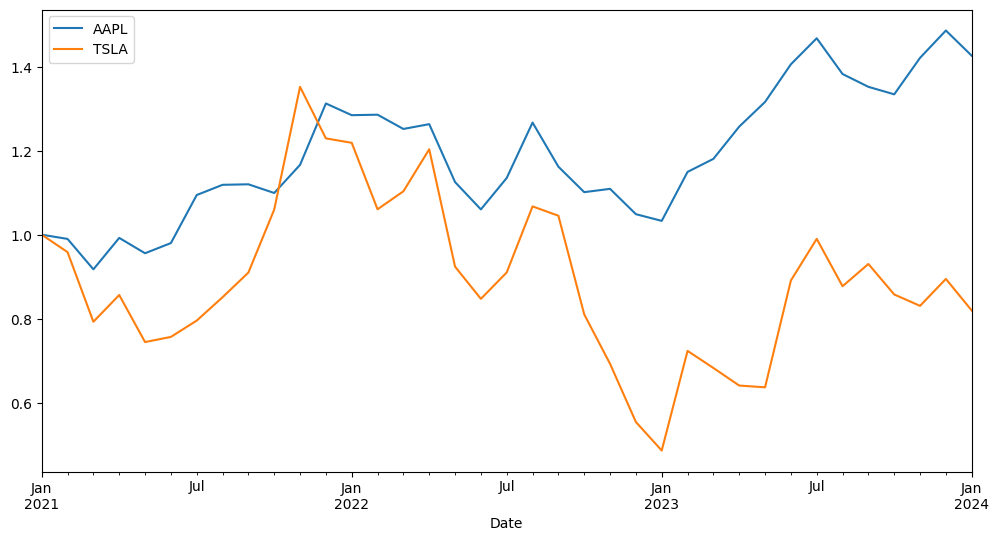

In [49]:
df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [51]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

C:\Users\A02291312\AppData\Local\Temp\ipykernel_16836\3704953283.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)


,AAPL,TSLA
Date,,
2021-01-31,0.019739,0.087355
2021-02-28,-0.094682,-0.195649
2021-03-31,-0.044132,-0.070319
2021-04-30,0.068732,0.072083
2021-05-31,-0.058192,-0.087122
2021-06-30,0.102032,0.089436
2021-07-31,0.062592,0.013719
2021-08-31,0.044963,0.036693
2021-09-30,-0.072192,0.056355


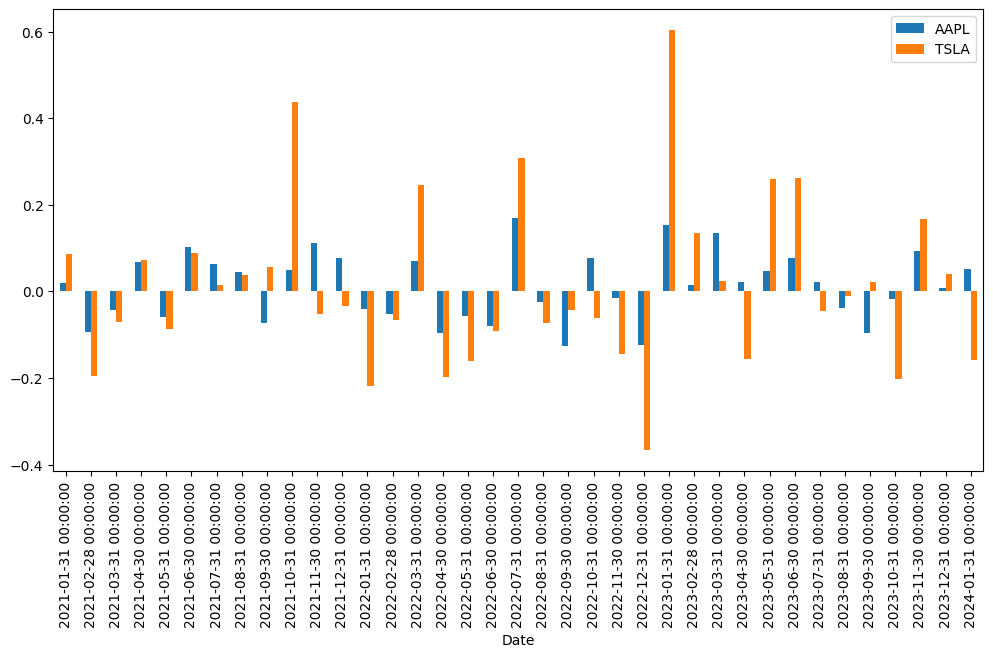

In [53]:
df.resample(rule='M').apply(lambda x : x.iloc[-1]/x.iloc[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [54]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2021-01-04,127.16
2021-01-05,128.74
2021-01-06,124.40
2021-01-07,128.65
2021-01-08,129.76


In [55]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2021-01-04,127.16,NaN,128.74
2021-01-05,128.74,127.16,124.40
2021-01-06,124.40,128.74,128.65
2021-01-07,128.65,124.40,129.76
2021-01-08,129.76,128.65,126.74


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [56]:
df.head()

,AAPL,TSLA
Date,,
2021-01-04,127.16,243.26
2021-01-05,128.74,245.04
2021-01-06,124.40,251.99
2021-01-07,128.65,272.01
2021-01-08,129.76,293.34


In [57]:
df.rolling(window=5).mean().head()

,AAPL,TSLA
Date,,
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,127.742,261.128


In [58]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [59]:
df.head()

,AAPL,TSLA,TSLA_MA(30)
Date,,,
2021-01-04,127.16,243.26,NaN
2021-01-05,128.74,245.04,NaN
2021-01-06,124.40,251.99,NaN
2021-01-07,128.65,272.01,NaN
2021-01-08,129.76,293.34,NaN


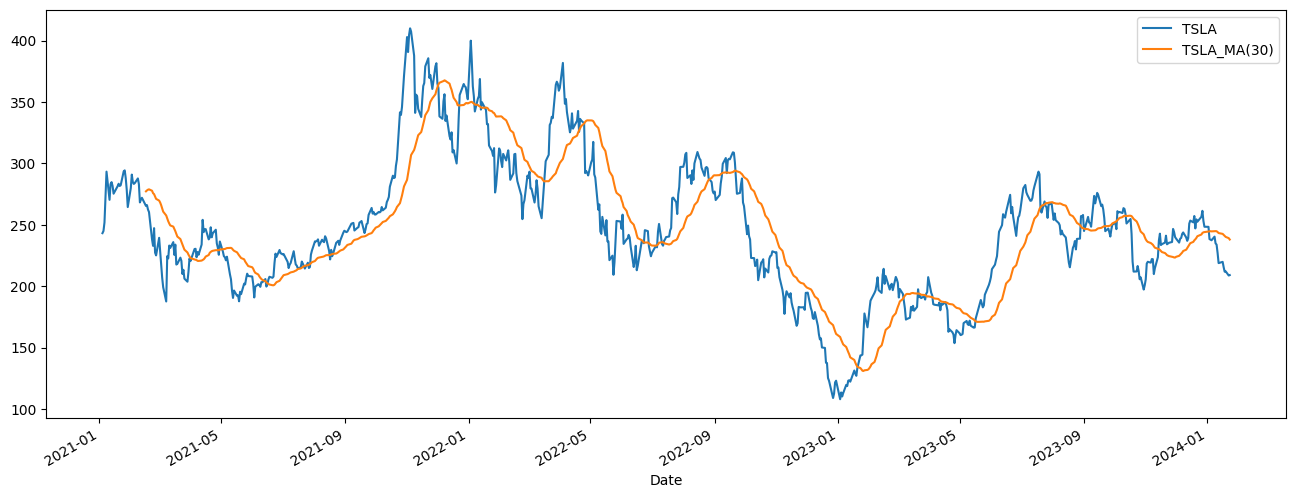

In [60]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [61]:
df['AAPL'].head()

Date
2021-01-04    127.16
2021-01-05    128.74
2021-01-06    124.40
2021-01-07    128.65
2021-01-08    129.76
Name: AAPL, dtype: float64

In [62]:
df['AAPL'].expanding().mean().head()

Date
2021-01-04    127.160000
2021-01-05    127.950000
2021-01-06    126.766667
2021-01-07    127.237500
2021-01-08    127.742000
Name: AAPL, dtype: float64

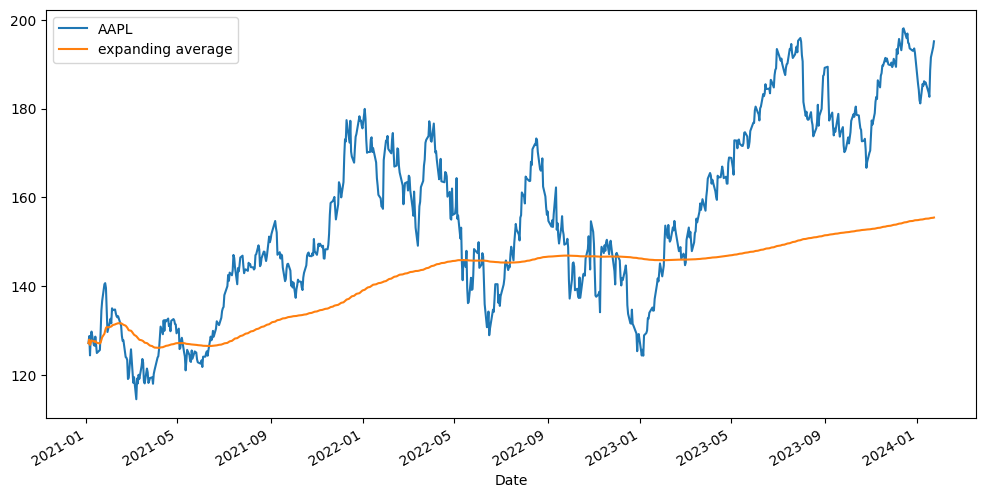

In [63]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()